In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import random
from itertools import combinations
from collections import Counter

In [5]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


###### Reading Dataset

In [6]:
# US E-commerce records 2020
all_data = pd.read_csv(r'F:\lareb\ECommerceRecords2020.csv')
all_data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01/01/2020,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01/01/2020,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01/01/2020,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01/01/2020,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01/01/2020,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


###### Replacing empty cell With NaN

In [63]:
df = all_data.replace(' ', np.nan)    
nan_values = df[df.isna().any(axis=1)]
nan_values

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6,01/01/2020,8073,CA-2017-151750,NaN,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,4,0.2,2.2288
15,02/01/2020,8363,CA-2017-147207,NaN,TS-21655,Consumer,United States,El Paso,Texas,79907,Central,FUR-TA-10002958,Furniture,Tables,"Bevis Oval Conference Table, Walnut",913.430,5,0.3,-169.6370
35,13/01/2020,6620,US-2017-167402,NaN,CP-12085,Corporate,United States,Springfield,Missouri,65807,Central,OFF-AR-10004010,Office Supplies,Art,Hunt Boston Vacuum Mount KS Pencil Sharpener,209.940,6,0.0,54.5844
45,14/01/2020,4913,CA-2017-127306,NaN,BH-11710,Consumer,United States,Johnson City,Tennessee,37604,South,OFF-BI-10002003,Office Supplies,Binders,Ibico Presentation Index for Binding Systems,5.970,5,0.7,-4.5770
142,30/01/2020,774,CA-2017-104220,NaN,BV-11245,Corporate,United States,Des Moines,Iowa,50315,Central,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,7.710,1,0.0,3.4695
196,13/02/2020,2731,CA-2017-104801,NaN,FH-14350,Consumer,United States,Seattle,Washington,98105,West,TEC-AC-10001838,Technology,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,799.960,4,0.0,343.9828
276,03/03/2020,3475,CA-2017-111815,NaN,EP-13915,Consumer,United States,Dearborn Heights,Michigan,48127,Central,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.980,2,0.0,42.9914
314,09/03/2020,8541,CA-2017-147354,NaN,KB-16315,Consumer,United States,Los Angeles,California,90008,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,30.840,5,0.2,9.6375
393,19/03/2020,4344,CA-2017-105410,NaN,ND-18370,Consumer,United States,San Francisco,California,94110,West,TEC-PH-10000038,Technology,Phones,Jawbone MINI JAMBOX Wireless Bluetooth Speaker,657.504,6,0.2,-131.5008
578,14/04/2020,931,CA-2017-144932,NaN,AB-10165,Consumer,United States,Toledo,Ohio,43615,East,OFF-AR-10001468,Office Supplies,Art,Sanford Prismacolor Professional Thick Lead Ar...,89.856,3,0.2,21.3408


###### Creating Duplicate Table without NaN values

In [64]:
withoutNaN=df.dropna()
withoutNaN

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01/01/2020,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01/01/2020,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01/01/2020,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01/01/2020,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01/01/2020,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30/12/2020,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30/12/2020,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30/12/2020,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30/12/2020,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


###### Adjusting missing values of Ship Mode Column with its respective values

In [66]:
for ndex, row in nan_values.iterrows():
    print(row['Order ID'],row['Row ID'])
    ww=withoutNaN[withoutNaN['Order ID'].str.contains(row['Order ID'])]['Ship Mode'].iloc[0]
    
#     print( (df[12:]['Row ID']==row['Row ID'])&(df[12:]['Order ID']==row['Order ID']) )
    df.loc[(df['Row ID']==row['Row ID'])&(df['Order ID']==row['Order ID']),'Ship Mode']=ww
    
# missing=nan_values['Order ID'].astype(pd.StringDtype())
# missing

# df[df['Order ID'].str.contains(missing)]

CA-2017-151750 8073
CA-2017-147207 8363
US-2017-167402 6620
CA-2017-127306 4913
CA-2017-104220 774
CA-2017-104801 2731
CA-2017-111815 3475
CA-2017-147354 8541
CA-2017-105410 4344
CA-2017-144932 931
CA-2017-159464 4426
CA-2017-134306 349


In [240]:
df[df['Order ID'].str.contains('CA-2017-104801')]

,Order Date,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Sales,Profit,json
195,13/02/2020,CA-2017-104801,Standard Class,FH-14350,Consumer,United States,Seattle,Washington,98105,West,6.63,1.7901,"{'Row ID': 2730, 'Category': 'Office Supplies'..."
196,13/02/2020,CA-2017-104801,Standard Class,FH-14350,Consumer,United States,Seattle,Washington,98105,West,799.96,343.9828,"{'Row ID': 2731, 'Category': 'Technology', 'Su..."
197,13/02/2020,CA-2017-104801,Standard Class,FH-14350,Consumer,United States,Seattle,Washington,98105,West,107.53,21.5060,"{'Row ID': 2732, 'Category': 'Furniture', 'Sub..."


###### Changing dataType of columns

In [186]:
df['Order ID'] = df['Order ID'].astype(pd.StringDtype())

In [270]:
df['Row ID'] = df['Row ID'].astype('int64')

In [294]:
df.dtypes

Order Date       object
Row ID            int64
Order ID         object
Ship Mode        object
Customer ID      object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

###### Replacing inverted Commas to in words value, to stop error generation which consider it as a end of the string. 

In [67]:
 df["Product Name"].str.find('"')

0        9
1       20
2       -1
3       -1
4       -1
        ..
3307    -1
3308    -1
3309    -1
3310    -1
3311    -1
Name: Product Name, Length: 3312, dtype: int64

In [68]:
df["Product Name"]=df["Product Name"].str.replace('"',' inches')

###### Creating Copy of Clean DataSet

In [70]:
df_original=df
df_original

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01/01/2020,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10 inches Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01/01/2020,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,Howard Miller 11-1/2 inches Diameter Brentwood...,474.430,11,0.0,199.2606
2,01/01/2020,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01/01/2020,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01/01/2020,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30/12/2020,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30/12/2020,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30/12/2020,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30/12/2020,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


###### Summerizing DataSet 

In [71]:
columns = ['Row ID','Category','Sub-Category','Product ID', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
df['json'] = df[columns].to_dict(orient='records')

In [72]:
df.loc[0]['json']

{'Row ID': 849,
 'Category': 'Furniture',
 'Sub-Category': 'Furnishings',
 'Product ID': 'FUR-FU-10003878',
 'Product Name': 'Linden 10 inches Round Wall Clock, Black',
 'Sales': 48.896,
 'Quantity': 4,
 'Discount': 0.2,
 'Profit': 8.5568}

In [73]:
dropColumns = ['Row ID','Category','Sub-Category','Product ID', 'Product Name', 'Quantity', 'Discount']
df = df.drop(columns=dropColumns)

In [42]:
aggregation_functions = {
   'Sales': 'sum',
   'Profit': 'sum',
   'Order Date': 'first',
   'Ship Mode': 'first',
   'Customer ID': 'first',
   'Segment': 'first',
   'Country': 'first',
   'City': 'first',
   'State': 'first',
   'Postal Code': 'first',
   'Region': 'first'
}

##### Generate aggregated copy of dataset for Profit and Sales

In [74]:
aggDf = df.groupby(df['Order ID']).aggregate(aggregation_functions)
# aggDf

##### Generate Copy of dataset merged on each Order ID

In [76]:
df_new = df.groupby(df['Order ID'])['json'].apply(list)

In [77]:
df_new.columns =['Order ID', 'Json']

In [78]:
df_new.dtypes

dtype('O')

In [79]:
dd=pd.merge(aggDf,df_new,on='Order ID')

In [80]:
dd

,Sales,Profit,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,json
Order ID,,,,,,,,,,,,
CA-2017-100013,29.690,12.2162,06/11/2020,Standard Class,ZC-21910,Consumer,United States,Los Angeles,California,90045,West,"[{'Row ID': 1229, 'Category': 'Office Supplies..."
CA-2017-100055,152.590,46.1733,28/05/2020,Standard Class,MD-17860,Corporate,United States,Laurel,Maryland,20707,East,"[{'Row ID': 9132, 'Category': 'Furniture', 'Su..."
CA-2017-100097,1115.250,302.4705,26/11/2020,Second Class,MN-17935,Consumer,United States,New York City,New York,10009,East,"[{'Row ID': 7320, 'Category': 'Technology', 'S..."
CA-2017-100111,7359.918,1571.7964,20/09/2020,Standard Class,SV-20365,Consumer,United States,New York City,New York,10035,East,"[{'Row ID': 6091, 'Category': 'Furniture', 'Su..."
CA-2017-100160,49.688,16.9641,07/09/2020,Standard Class,CB-12025,Consumer,United States,Philadelphia,Pennsylvania,19134,East,"[{'Row ID': 4152, 'Category': 'Office Supplies..."
...,...,...,...,...,...,...,...,...,...,...,...,...
US-2017-168802,18.368,5.9696,03/11/2020,Standard Class,JO-15145,Corporate,United States,Seattle,Washington,98103,West,"[{'Row ID': 8294, 'Category': 'Office Supplies..."
US-2017-169320,171.430,16.6721,23/07/2020,Second Class,LH-16900,Consumer,United States,Elkhart,Indiana,46514,Central,"[{'Row ID': 4373, 'Category': 'Office Supplies..."
US-2017-169488,56.860,26.5552,07/09/2020,First Class,AA-10375,Consumer,United States,Providence,Rhode Island,2908,East,"[{'Row ID': 9539, 'Category': 'Office Supplies..."


##### save aggregated Data to Csv

In [336]:
dd.to_csv(r'F:\lareb\USDataAggregated2.csv')

In [81]:
dd.dtypes

Sales          float64
Profit         float64
Order Date      object
Ship Mode       object
Customer ID     object
Segment         object
Country         object
City            object
State           object
Postal Code      int64
Region          object
json            object
dtype: object

##### Converting 'Postal Code' data type to avoid calculation on address column

In [82]:
dd['Postal Code'] = dd['Postal Code'].astype(pd.StringDtype())

##### Adding Month Column

In [257]:
dd['Month'] = dd['Order Date'].str[3:5]
dd['Month'] = dd['Month'].astype('int32')

##### Generating Random colors for the Graphs

In [85]:
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=350)

# EXPLORATORY DATA ANALYSIS

### 1. Month Wise Profit And Sales Report

In [258]:
dd.sort_values('Month', ascending=True).groupby(['Month']).sum()

,Sales,Profit
Month,,
1,43971.3740,7140.4391
2,20301.1334,1613.8720
3,58872.3528,14751.8915
4,36521.5361,933.2900
5,44261.1102,6342.5828
6,52981.7257,8223.3357
7,45264.4160,6952.6212
8,63120.8880,9040.9557
9,87866.6520,10991.5556


### 2. Month Wise Sales Analysis

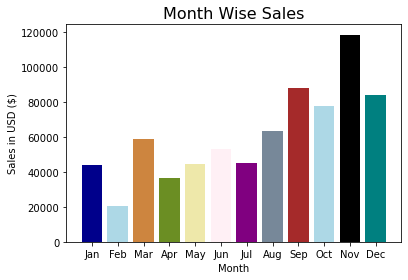

In [259]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.bar(months,dd.groupby(['Month']).sum()['Sales'], color=c)
plt.xticks(months)
plt.title("Month Wise Sales", fontsize=16)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()


### 3. Month Wise Profit Analysis

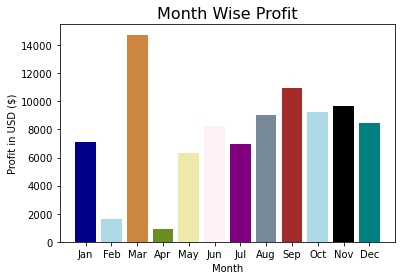

In [262]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(months,dd.groupby(['Month']).sum()['Profit'], color=c)
plt.xticks(months)
plt.title("Month Wise Profit", fontsize=16)
plt.ylabel('Profit in USD ($)')
plt.xlabel('Month')
plt.show()

In [270]:
dd=dd.drop('Month',axis=1)

KeyError: "['Month'] not found in axis"

### 4. Region Wise Sales and Profit Analysis

In [271]:
dd.groupby(['Region']).sum()

,Sales,Profit
Region,,
Central,147098.1282,7550.8442
East,213082.9040,33230.5614
South,122905.8575,8848.9079
West,250128.3655,43808.9561


### 5. State Wise Sales and Profit Analysis

In [272]:
dd.groupby(['State']).sum()

,Sales,Profit
State,,
Alabama,1828.2500,496.3771
Arizona,11133.5370,-1276.0025
Arkansas,2707.6400,959.4027
California,146388.3445,29366.4589
Colorado,10299.8130,-4435.8483
Connecticut,5307.2100,1479.7616
Delaware,13754.9830,6053.2049
District of Columbia,77.7600,35.0640
Florida,26444.7155,244.1266


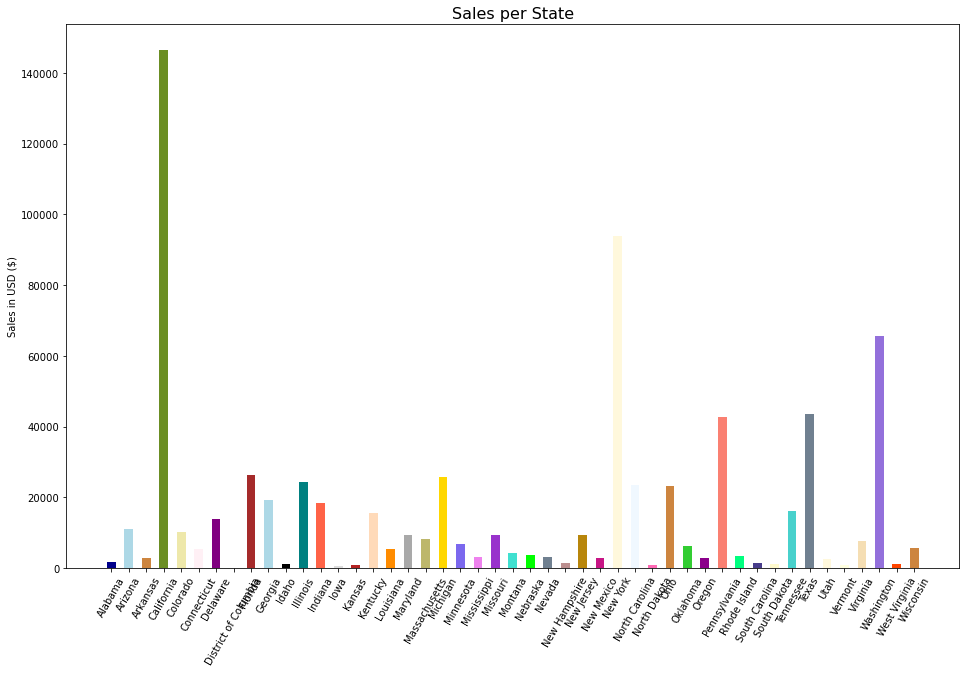

In [278]:
keys = [state for state, df in dd.groupby(['State'])]

plt.bar(keys,dd.groupby(['State']).sum()['Sales'], color=c, width=.5)
plt.rcParams["figure.figsize"] = (20, 10)
# plt.figure(figsize=(10,10),dpi= 80)
plt.ylabel('Sales in USD ($)')
plt.title("Sales per State", fontsize=16)
# plt.xlabel('States')
# plt.figure(figsize = (12,6))
plt.xticks(keys, rotation=60)
plt.show()

### 6. Top 10 Products By Sales

In [247]:
# Grouping products by sales
prod_sales = pd.DataFrame(df_original.groupby('Product Name').sum()['Sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,35699.898
Martin Yale Chadless Opener Electric Letter Opener,11825.902
GBC DocuBind TL300 Electric Binding System,10943.278
Hewlett Packard LaserJet 3310 Copier,9239.846
Samsung Galaxy Mega 6.3,9239.780
Cubify CubeX 3D Printer Triple Head Print,7999.980
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7371.742
HON 5400 Series Task Chairs for Big and Tall,7220.094
GBC DocuBind P400 Electric Binding System,7077.148


### 7. Top Most Sold Products

In [248]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df_original.groupby('Product Name').sum()['Quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['Quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,Quantity
Product Name,
Staples,68
Easy-staple paper,58
Staples in misc. colors,52
Staple envelope,39
Storex Dura Pro Binders,37
Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive,34
Eldon Wave Desk Accessories,34
"Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table",30
Adjustable Depth Letter/Legal Cart,29


### 8. Profit Generated By Each Category along with its Sub-Category 

In [252]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df_original.groupby(['Category', 'Sub-Category']).sum()['Profit'])

# Sorting the values
cat_subcat.sort_values(['Category','Profit'], ascending=False)

Profit
Category        Sub-Category            
Technology      Copiers       25031.7902
                Accessories   15672.3570
                Phones        12849.3250
                Machines      -2869.2156
Office Supplies Paper         12040.8434
                Appliances     7865.2683
                Binders        7669.7418
                Storage        7402.8007
                Art            2221.9631
                Labels         1744.6093
                Envelopes      1441.7590
                Fasteners       304.9489
                Supplies       -955.3128
Furniture       Chairs         7643.5493
                Furnishings    4099.1628
                Bookcases      -583.6261
                Tables        -8140.6947

### 9. Top 50 Products Sold By Quantity

In [106]:
df2['Grouped'].iloc[0]

'SAFCO Boltless Steel Shelving|Tenex Carpeted, Granite-Look or Clear Contemporary Contour Shape Chair Mats|Office Star - Contemporary Task Swivel Chair|Fluorescent Highlighters by Dixon|GBC Instant Report Kit|Pressboard Covers with Storage Hooks, 9 1/2 inches x 11 inches, Light Blue|Fellowes Superior 10 Outlet Split Surge Protector'

In [108]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split('|')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Toshiba IPT2010-SD IP\xa0Telephone', 'KI Adjustable-Height Table') 2
('Eldon Expressions Punched Metal & Wood Desk Accessories, Black & Cherry', 'GBC DocuBind TL300 Electric Binding System') 2
('SAFCO Optional Arm Kit for Workspace Cribbage Stacking Chair', 'Belkin Premiere Surge Master II 8-outlet surge protector') 2
('OIC #2 Pencils, Medium Soft', 'Avery 505') 2
('Staples', 'KI Adjustable-Height Table') 2
('Wilson Jones Turn Tabs Binder Tool for Ring Binders', 'Adjustable Depth Letter/Legal Cart') 2
('Maxell\xa0iVDR EX 500GB Cartridge', 'Adjustable Depth Letter/Legal Cart') 2
('Newell 344', 'Memorex Micro Travel Drive 16 GB') 2
('Memorex Micro Travel Drive 16 GB', 'Wirebound Four 2-3/4 x 5 Forms per Page, 400 Sets per Book') 2
('Memorex Micro Travel Drive 16 GB', 'Elite 5 inches Scissors') 2


In [125]:
df_dup=df_original.nlargest(50,['Quantity'])
df_dup

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,json
8,01/01/2020,8075,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2 in...",13.748,14,0.80,-22.6842,"{'Row ID': 8075, 'Category': 'Office Supplies'..."
1151,26/06/2020,5386,CA-2017-161410,Standard Class,CC-12220,Consumer,United States,Philadelphia,Pennsylvania,19143,East,TEC-PH-10000673,Technology,Phones,Plantronics Voyager Pro HD - Bluetooth Headset,545.916,14,0.40,72.7888,"{'Row ID': 5386, 'Category': 'Technology', 'Su..."
1608,27/08/2020,8936,CA-2017-130036,Same Day,BP-11185,Corporate,United States,Philadelphia,Pennsylvania,19120,East,TEC-AC-10001908,Technology,Accessories,Logitech Wireless Headset h800,1119.888,14,0.20,209.9790,"{'Row ID': 8936, 'Category': 'Technology', 'Su..."
2197,12/10/2020,1046,CA-2017-152702,Standard Class,SN-20710,Home Office,United States,Rockford,Illinois,61107,Central,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",254.604,14,0.30,-18.1860,"{'Row ID': 1046, 'Category': 'Furniture', 'Sub..."
2373,30/10/2020,1712,CA-2017-123491,Standard Class,JK-15205,Consumer,United States,San Francisco,California,94122,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",1702.120,14,0.00,510.6360,"{'Row ID': 1712, 'Category': 'Office Supplies'..."
2529,10/11/2020,1364,US-2017-155425,First Class,AB-10600,Corporate,United States,Tucson,Arizona,85705,West,OFF-BI-10001036,Office Supplies,Binders,Cardinal EasyOpen D-Ring Binders,38.388,14,0.70,-25.5920,"{'Row ID': 1364, 'Category': 'Office Supplies'..."
2778,24/11/2020,9942,CA-2017-164028,Standard Class,JL-15835,Consumer,United States,San Francisco,California,94122,West,TEC-AC-10001772,Technology,Accessories,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,223.580,14,0.00,87.1962,"{'Row ID': 9942, 'Category': 'Technology', 'Su..."
3098,14/12/2020,2948,CA-2017-169859,Standard Class,MP-18175,Home Office,United States,San Diego,California,92024,West,OFF-BI-10000174,Office Supplies,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,64.960,14,0.20,22.7360,"{'Row ID': 2948, 'Category': 'Office Supplies'..."
494,31/03/2020,3243,CA-2017-114524,Second Class,EG-13900,Consumer,United States,Chicago,Illinois,60623,Central,OFF-BI-10002799,Office Supplies,Binders,"SlimView Poly Binder, 3/8 inches",13.468,13,0.80,-22.8956,"{'Row ID': 3243, 'Category': 'Office Supplies'..."
503,01/04/2020,2618,CA-2017-147942,Standard Class,MS-17365,Consumer,United States,San Francisco,California,94110,West,OFF-BI-10001294,Office Supplies,Binders,Fellowes Binding Cases,121.680,13,0.20,38.0250,"{'Row ID': 2618, 'Category': 'Office Supplies'..."


ConversionError: Failed to convert value(s) to axis units: ['12-1/2 Diameter Round Wall Clock', 'AT&T 841000 Phone', 'Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection', 'Avery 518', 'Avery Durable Poly Binders', 'Binney & Smith inkTank Desk Highlighter, Chisel Tip, Yellow, 12/Box', 'Black & Decker Filter for Double Action Dustbuster Cordless Vac BLDV7210', 'Cardinal EasyOpen D-Ring Binders', 'Chromcraft Round Conference Tables', 'Eldon 200 Class Desk Accessories, Smoke', "Eldon Fold 'N Roll Cart System", 'Eldon Shelf Savers Cubes and Bins', 'Eldon Wave Desk Accessories', 'Executive Impressions Supervisor Wall Clock', 'Fellowes Binding Cases', 'Fellowes Powershred HS-440 4-Sheet High Security Shredder', 'GBC DocuBind P50 Personal Binding Machine', 'Global Stack Chair without Arms, Black', 'Google Nexus 5', 'Hon 4070 Series Pagoda Armless Upholstered Stacking Chairs', 'Howard Miller 11-1/2 inches Diameter Brentwood Wall Clock', 'Howard Miller Distant Time Traveler Alarm Clock', 'Iceberg Mobile Mega Data/Printer Cart ', 'Kensington 7 Outlet MasterPiece HOMEOFFICE Power Control Center', 'Logitech Wireless Headset h800', 'Logitech Wireless Touch Keyboard K400', 'Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive', 'Nu-Dell Leatherette Frames', "O'Sullivan 4-Shelf Bookcase in Odessa Pine", 'Peel-Off China Markers', 'Plantronics Audio 995 Wireless Stereo Headset', 'Plantronics Voyager Pro HD - Bluetooth Headset', 'Pressboard Covers with Storage Hooks, 9 1/2 inches x 11 inches, Light Blue', 'Ricoh - Ink Collector Unit for GX3000 Series Printers', 'Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer', 'Samsung Galaxy Mega 6.3', 'SanDisk Cruzer 64 GB USB Flash Drive', 'Satellite Sectional Post Binders', 'Situations Contoured Folding Chairs, 4/Set', 'SlimView Poly Binder, 3/8 inches', 'Square Credit Card Reader, 4 1/2 inches x 4 1/2 inches x 1 inches, White', 'Staples', 'Staples in misc. colors', 'Storex Dura Pro Binders', 'Strathmore Photo Mount Cards', 'TRENDnet 56K USB 2.0 Phone, Internet and Fax Modem', 'Wilson Jones Century Plastic Molded Ring Binders', 'Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear', 'Xerox 1894', 'Xerox 1939']

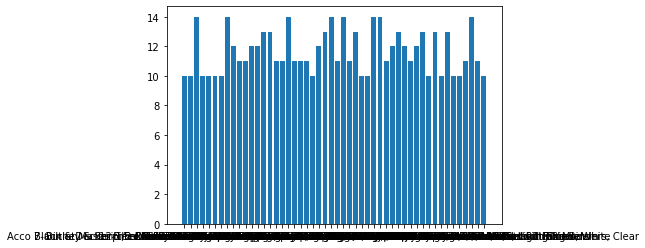

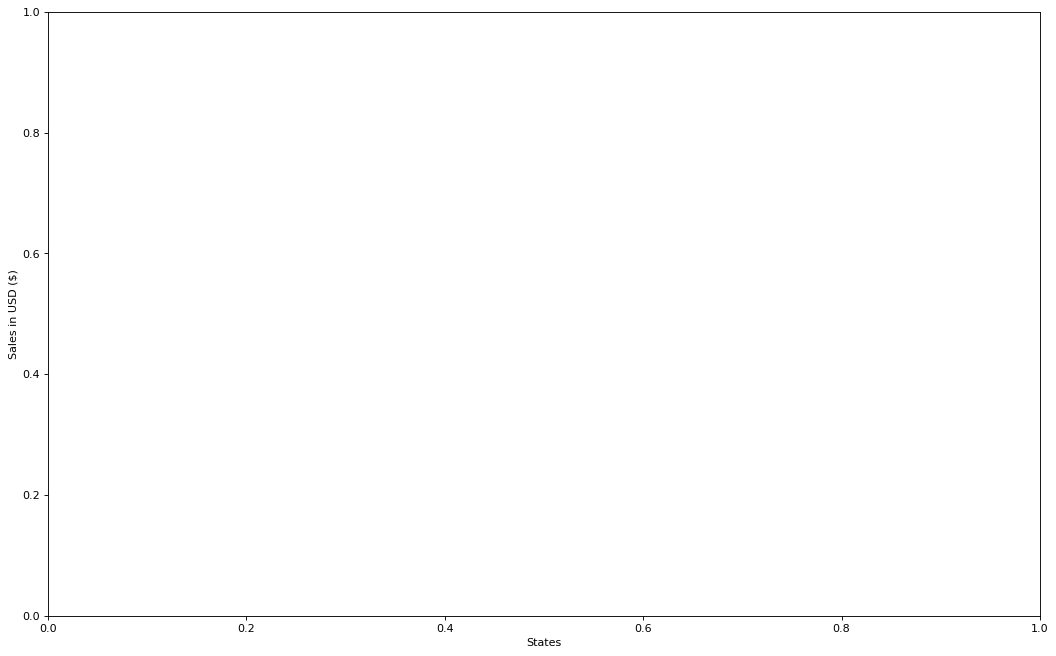

In [139]:

product_group = df_dup.groupby(['Product Name'])
quantity_ordered = product_group.sum()['Quantity']
# product_group
keys = [pair for pair, df in product_group]
keys
plt.bar(keys, quantity_ordered)
plt.figure(figsize=(16,10),dpi= 80)
plt.ylabel('Sales in USD ($)')
plt.xlabel('States')
plt.xticks(keys, rotation=60)
plt.show()


# keys = [state for state, df in dd.groupby(['State'])]

# plt.bar(keys,dd.groupby(['State']).sum()['Sales'], color=c, width=.5)
# # plt.rcParams["figure.figsize"] = (16, 10)
# # plt.figure(figsize=(16,10),dpi= 80)
# plt.ylabel('Sales in USD ($)')
# plt.title("Sales per State", fontsize=16)
# plt.xlabel('States')
# plt.xticks(keys, rotation=60)
# plt.show()

In [143]:
#end
# df_original
# df_original=df_original.drop('json' ,axis=1)
df_original

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01/01/2020,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10 inches Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01/01/2020,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,Howard Miller 11-1/2 inches Diameter Brentwood...,474.430,11,0.0,199.2606
2,01/01/2020,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01/01/2020,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01/01/2020,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30/12/2020,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30/12/2020,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30/12/2020,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30/12/2020,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


### 11. Purchase According to Category 

F:\lareb\a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

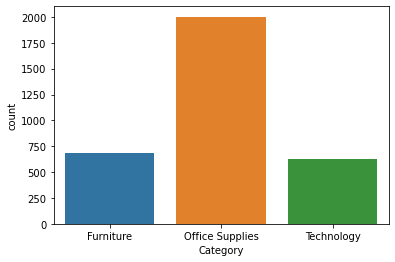

In [150]:
sns.countplot('Category', data = df_original)

##### Dummies for Category to categorize products and there Sales Accordingly

In [153]:
g_dummies = pd.get_dummies(df_original['Category'])
g_dummies.head()

,Furniture,Office Supplies,Technology
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [156]:
df_categories=df_original
df_categories = pd.concat([df_categories, g_dummies], axis = 1)
df_categories.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Furniture,Office Supplies,Technology
0,01/01/2020,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furniture,Furnishings,"Linden 10 inches Round Wall Clock, Black",48.896,4,0.2,8.5568,1,0,0
1,01/01/2020,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furniture,Furnishings,Howard Miller 11-1/2 inches Diameter Brentwood...,474.430,11,0.0,199.2606,1,0,0
2,01/01/2020,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,0,1,0
3,01/01/2020,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,0,1,0
4,01/01/2020,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,1,0,0


### 12. Category 'Furniture' Sold in each State

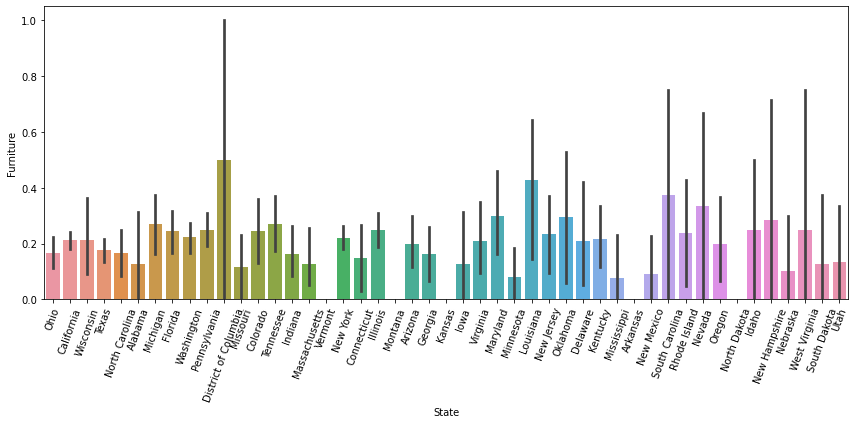

In [159]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'State', y = 'Furniture Sold', data = df_categories)
plt.xticks(rotation=70)
plt.title("Furniture Sold in each State", fontsize=16)
plt.tight_layout()

### 13. Category 'Office Supplies' Sold in each State

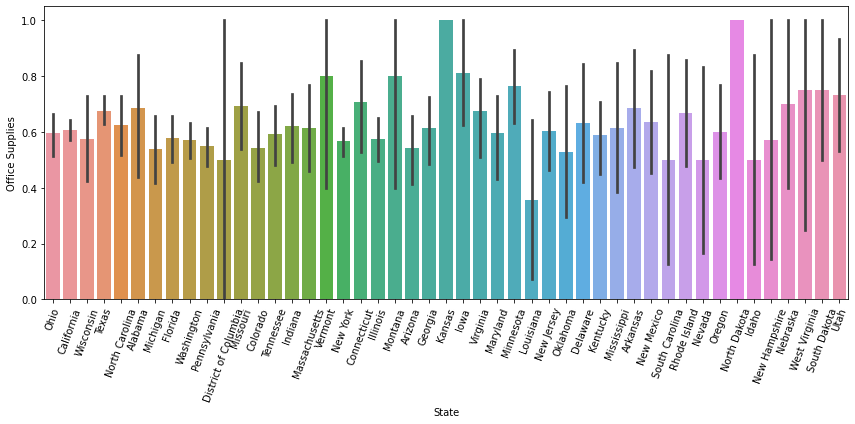

In [160]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'State', y = 'Office Supplies', data = df_categories)
plt.xticks(rotation=70)
plt.tight_layout()

### 14. Category 'Technology' Sold in each State

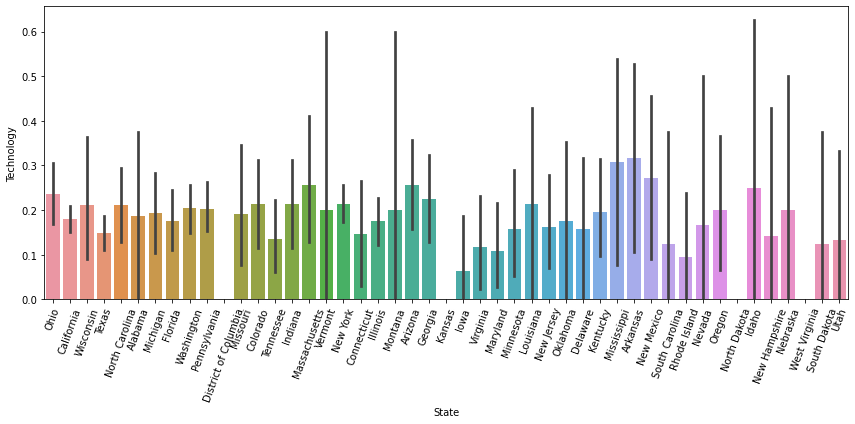

In [161]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'State', y = 'Technology', data = df_categories)
plt.xticks(rotation=70)
plt.tight_layout()

F:\lareb\a\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x232b90f2df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

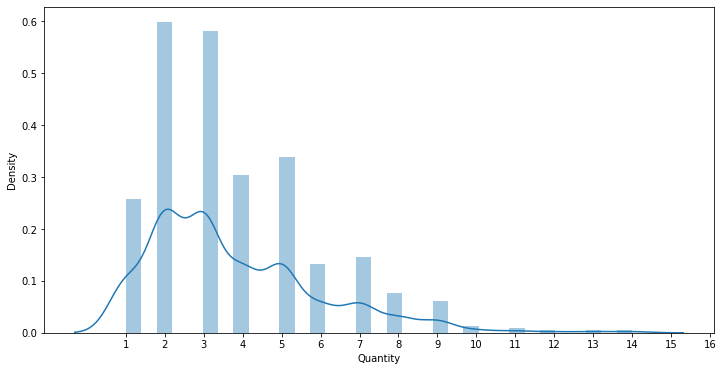

In [164]:
xdata = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.figure(figsize = (12,6))
sns.distplot(df_original['Quantity'])
plt.xticks(xdata)

### 15. HeatMap for Dataset

<AxesSubplot:>

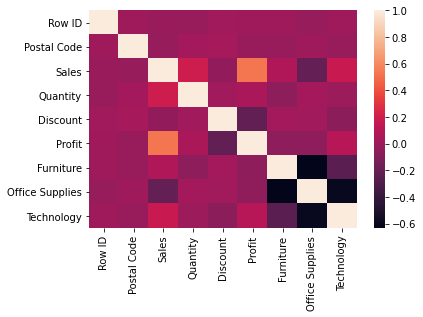

In [167]:
sns.heatmap(df_categories.corr())

### 16. Most Sales Performed using 'Ship Mode' 

<AxesSubplot:ylabel='Sales'>

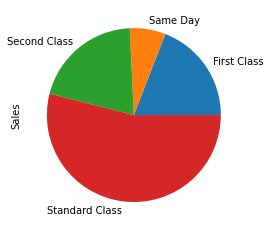

In [168]:
pie = df_original.groupby('Ship Mode')['Sales'].sum().plot(kind= 'pie')
pie

### 17. Most Store Customer

<AxesSubplot:ylabel='Sales'>

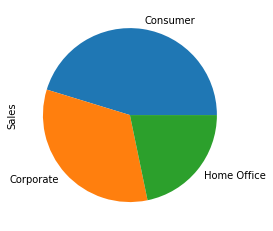

In [169]:
pie = df_original.groupby('Segment')['Sales'].sum().plot(kind= 'pie')
pie

### 18. Frequently consumed Shiping Mode by Category 

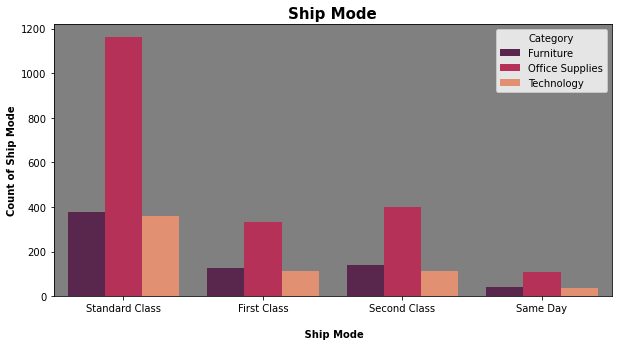

In [171]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data = df_original, x='Ship Mode',hue='Category' ,palette='rocket')
ax.set(facecolor = 'grey')
plt.xlabel('\n Ship Mode', fontweight = 'bold', fontsize = 10)
plt.ylabel('Count of Ship Mode', fontweight = 'bold', fontsize = 10)
plt.title('Ship Mode', fontweight = 'bold', fontsize = 15)
plt.savefig("Ship Mode.png")
plt.show()

### 19. Sales Rise through-out the Year

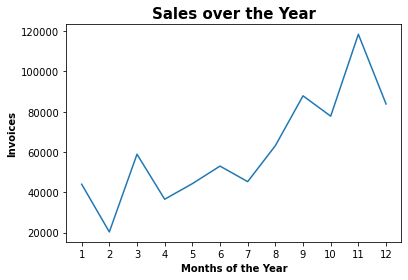

In [180]:
df_months=df_original
df_months['Month'] = df_months['Order Date'].str[3:5]
df_months['Month'] = df_months['Month'].astype('int32')
keys = [pair for pair, df in df_months.groupby(['Month'])]
ax.set(facecolor = 'grey')
plt.plot(keys, df_months.groupby(['Month']).sum()['Sales'])
plt.xticks(keys)
plt.xlabel('Months of the Year', fontweight = 'bold', fontsize =10)
plt.ylabel('Invoices', fontweight = 'bold', fontsize =10)
plt.title('Sales over the Year', fontweight = 'bold', fontsize =15)
plt.savefig("Sales over the Year.png")
plt.show()

### 21. Most Customer Consume which Shiping Line

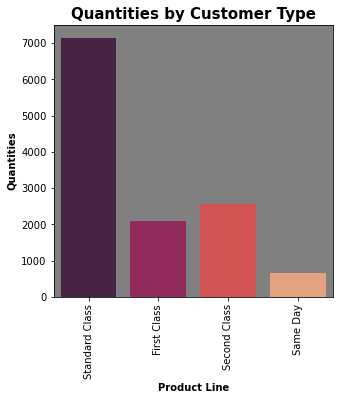

In [188]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x='Ship Mode',y='Quantity',data = df_original, estimator=sum, palette = 'rocket', ci = None)
ax.set(facecolor = 'grey')
plt.xticks(rotation=90)
plt.xlabel('Product Line', fontweight = 'bold', fontsize =10)
plt.ylabel('Quantities', fontweight = 'bold', fontsize =10)
plt.title('Quantities by Ship Mode', fontweight = 'bold', fontsize =15)
plt.savefig("Quantities by Ship Mode.png")
plt.show()

### 22. Products consumed By each State

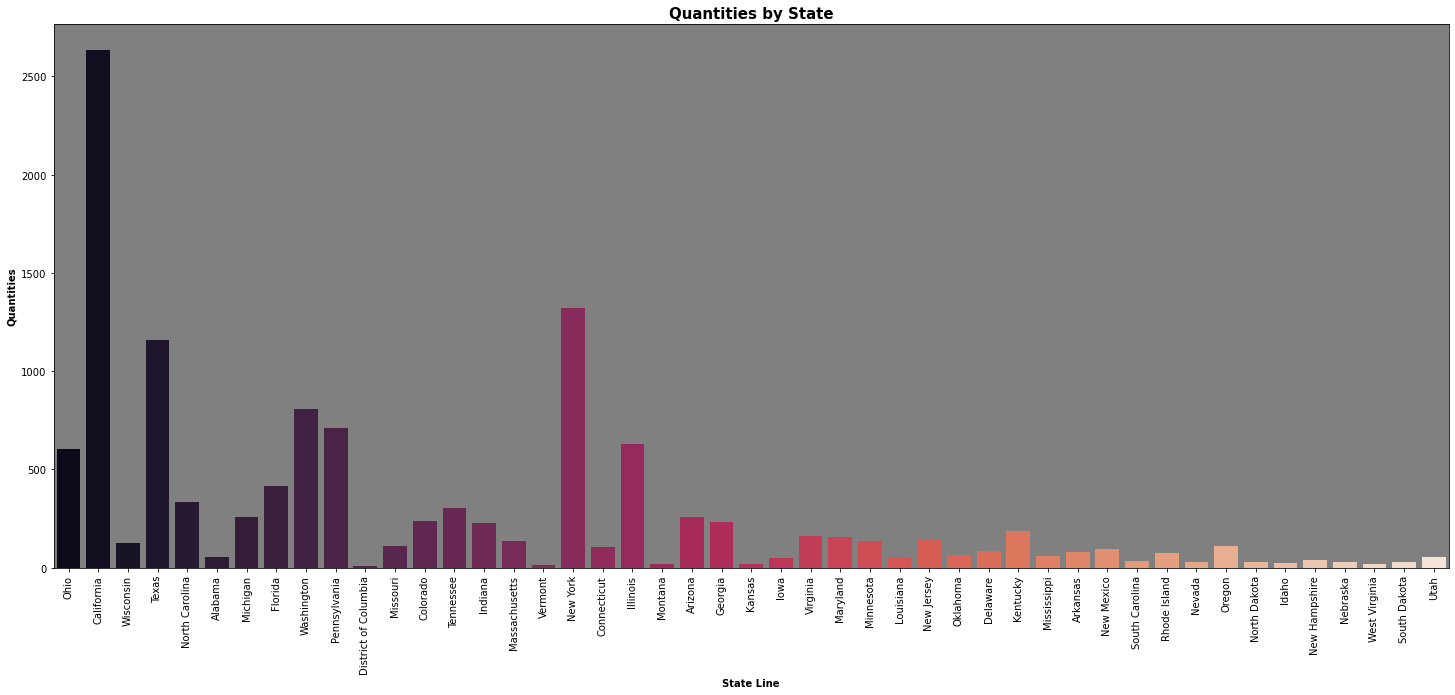

In [194]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='State',y='Quantity',data = df_original, estimator=sum, palette = 'rocket', ci = None)
ax.set(facecolor = 'grey')
plt.xticks(rotation=90)
plt.xlabel('State Line', fontweight = 'bold', fontsize =10)
plt.ylabel('Quantities', fontweight = 'bold', fontsize =10)
plt.title('Quantities by State', fontweight = 'bold', fontsize =15)
plt.savefig("Quantities by State.png")
plt.show()

### 23. Profit Generated By each State

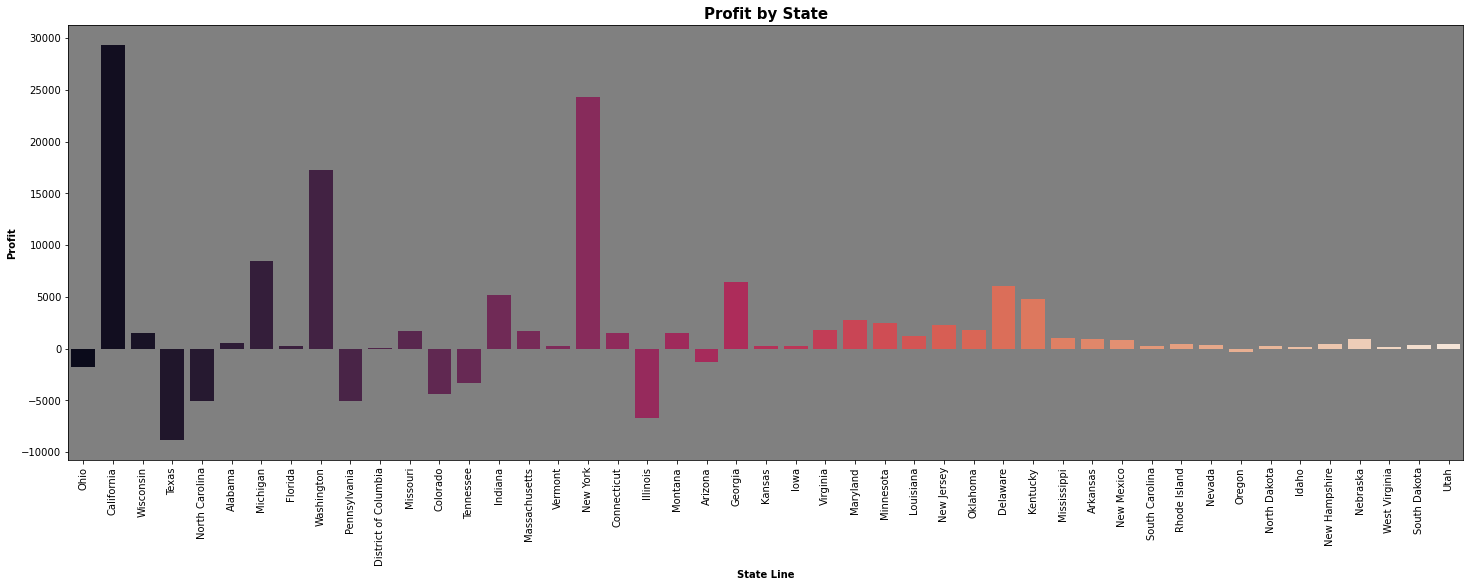

In [193]:
fig, ax = plt.subplots(figsize=(25,8))
sns.barplot(x='State',y='Profit',data = df_original, estimator=sum, palette = 'rocket', ci = None)
ax.set(facecolor = 'grey')
plt.xticks(rotation=90)
plt.xlabel('State Line', fontweight = 'bold', fontsize =10)
plt.ylabel('Profit', fontweight = 'bold', fontsize =10)
plt.title('Profit by State', fontweight = 'bold', fontsize =15)
plt.savefig("Profit by State.png")
plt.show()

### 24. State Sales Across Months

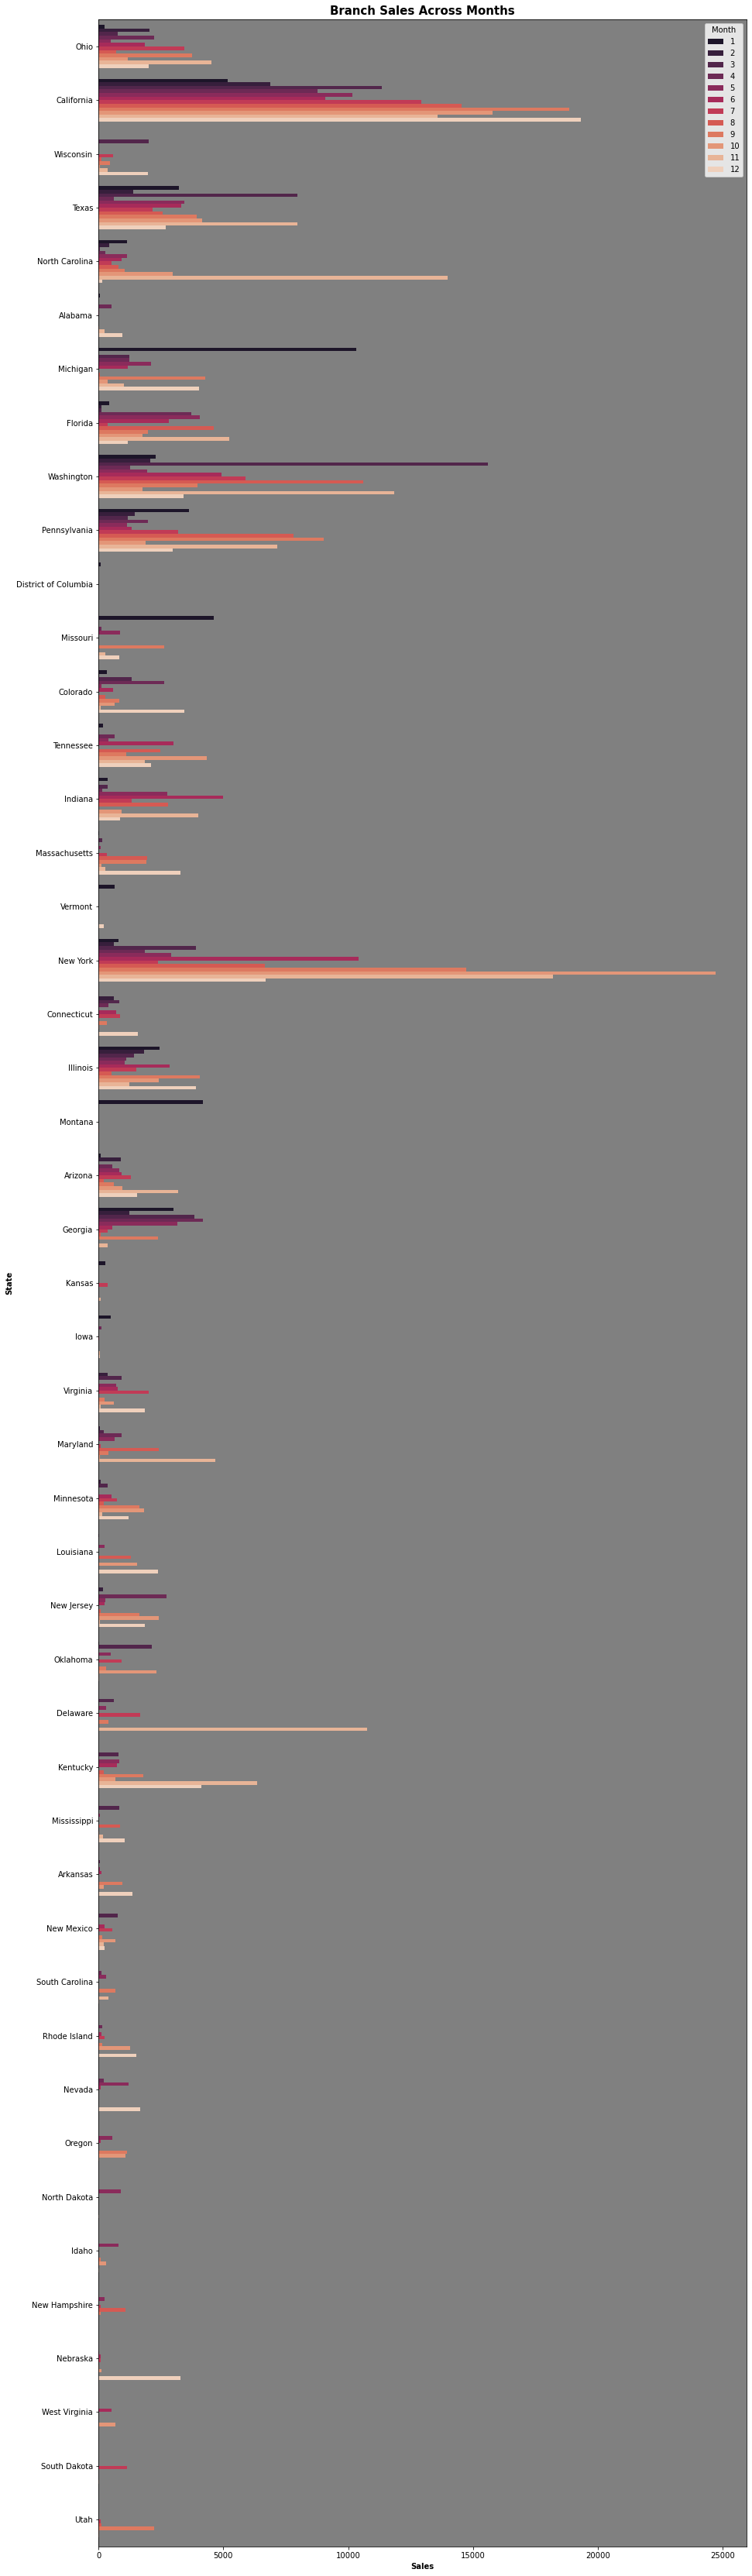

In [197]:
fig, ax = plt.subplots(figsize=(15,60))
sns.barplot(y='State',x='Sales',data = df_months, estimator=sum,hue = df_months['Month'], palette = 'rocket', ci = None)
ax.set(facecolor = 'grey')
plt.xlabel('Sales', fontweight = 'bold', fontsize =10)
plt.ylabel('State', fontweight = 'bold', fontsize =10)
plt.title('Branch Sales Across Months', fontweight = 'bold', fontsize =15)
plt.savefig("State Sales Across Months.png")
plt.show()

# Model Predictions

In [198]:
aggDf


,Sales,Profit,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region
Order ID,,,,,,,,,,,
CA-2017-100013,29.690,12.2162,06/11/2020,Standard Class,ZC-21910,Consumer,United States,Los Angeles,California,90045,West
CA-2017-100055,152.590,46.1733,28/05/2020,Standard Class,MD-17860,Corporate,United States,Laurel,Maryland,20707,East
CA-2017-100097,1115.250,302.4705,26/11/2020,Second Class,MN-17935,Consumer,United States,New York City,New York,10009,East
CA-2017-100111,7359.918,1571.7964,20/09/2020,Standard Class,SV-20365,Consumer,United States,New York City,New York,10035,East
CA-2017-100160,49.688,16.9641,07/09/2020,Standard Class,CB-12025,Consumer,United States,Philadelphia,Pennsylvania,19134,East
...,...,...,...,...,...,...,...,...,...,...,...
US-2017-168802,18.368,5.9696,03/11/2020,Standard Class,JO-15145,Corporate,United States,Seattle,Washington,98103,West
US-2017-169320,171.430,16.6721,23/07/2020,Second Class,LH-16900,Consumer,United States,Elkhart,Indiana,46514,Central
US-2017-169488,56.860,26.5552,07/09/2020,First Class,AA-10375,Consumer,United States,Providence,Rhode Island,2908,East


In [204]:
data=aggDf

In [208]:
data['Order ID']=data.index

In [209]:
data

,Sales,Profit,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Order ID
Order ID,,,,,,,,,,,,
CA-2017-100013,29.690,12.2162,06/11/2020,Standard Class,ZC-21910,Consumer,United States,Los Angeles,California,90045,West,CA-2017-100013
CA-2017-100055,152.590,46.1733,28/05/2020,Standard Class,MD-17860,Corporate,United States,Laurel,Maryland,20707,East,CA-2017-100055
CA-2017-100097,1115.250,302.4705,26/11/2020,Second Class,MN-17935,Consumer,United States,New York City,New York,10009,East,CA-2017-100097
CA-2017-100111,7359.918,1571.7964,20/09/2020,Standard Class,SV-20365,Consumer,United States,New York City,New York,10035,East,CA-2017-100111
CA-2017-100160,49.688,16.9641,07/09/2020,Standard Class,CB-12025,Consumer,United States,Philadelphia,Pennsylvania,19134,East,CA-2017-100160
...,...,...,...,...,...,...,...,...,...,...,...,...
US-2017-168802,18.368,5.9696,03/11/2020,Standard Class,JO-15145,Corporate,United States,Seattle,Washington,98103,West,US-2017-168802
US-2017-169320,171.430,16.6721,23/07/2020,Second Class,LH-16900,Consumer,United States,Elkhart,Indiana,46514,Central,US-2017-169320
US-2017-169488,56.860,26.5552,07/09/2020,First Class,AA-10375,Consumer,United States,Providence,Rhode Island,2908,East,US-2017-169488


In [215]:
data.reset_index(drop=True)

,Sales,Profit,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Order ID
0,29.690,12.2162,06/11/2020,Standard Class,ZC-21910,Consumer,United States,Los Angeles,California,90045,West,CA-2017-100013
1,152.590,46.1733,28/05/2020,Standard Class,MD-17860,Corporate,United States,Laurel,Maryland,20707,East,CA-2017-100055
2,1115.250,302.4705,26/11/2020,Second Class,MN-17935,Consumer,United States,New York City,New York,10009,East,CA-2017-100097
3,7359.918,1571.7964,20/09/2020,Standard Class,SV-20365,Consumer,United States,New York City,New York,10035,East,CA-2017-100111
4,49.688,16.9641,07/09/2020,Standard Class,CB-12025,Consumer,United States,Philadelphia,Pennsylvania,19134,East,CA-2017-100160
...,...,...,...,...,...,...,...,...,...,...,...,...
1682,18.368,5.9696,03/11/2020,Standard Class,JO-15145,Corporate,United States,Seattle,Washington,98103,West,US-2017-168802
1683,171.430,16.6721,23/07/2020,Second Class,LH-16900,Consumer,United States,Elkhart,Indiana,46514,Central,US-2017-169320
1684,56.860,26.5552,07/09/2020,First Class,AA-10375,Consumer,United States,Providence,Rhode Island,2908,East,US-2017-169488
1685,113.410,32.4527,28/08/2020,Standard Class,MG-17650,Home Office,United States,Milwaukee,Wisconsin,53209,Central,US-2017-169502


##### Transforming Catagorical data 

In [216]:
list_1=list(data.columns)

In [217]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [218]:
list_cate

['Order Date',
 'Ship Mode',
 'Customer ID',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Order ID']

In [219]:
le=LabelEncoder()

In [220]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [221]:
data

,Sales,Profit,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Order ID
Order ID,,,,,,,,,,,,
CA-2017-100013,29.690,12.2162,62,3,691,0,0,174,3,90045,3,0
CA-2017-100055,152.590,46.1733,290,3,435,1,0,164,17,20707,1,1
CA-2017-100097,1115.250,302.4705,274,2,464,0,0,216,29,10009,1,2
CA-2017-100111,7359.918,1571.7964,206,3,627,0,0,216,29,10035,1,3
CA-2017-100160,49.688,16.9641,70,3,114,0,0,249,35,19134,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
US-2017-168802,18.368,5.9696,31,3,351,1,0,300,44,98103,3,1682
US-2017-169320,171.430,16.6721,237,2,405,0,0,85,12,46514,0,1683
US-2017-169488,56.860,26.5552,70,0,1,0,0,261,36,2908,1,1684


In [224]:
data.drop('Postal Code' ,axis=1)

,Sales,Profit,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Order ID
Order ID,,,,,,,,,,,
CA-2017-100013,29.690,12.2162,62,3,691,0,0,174,3,3,0
CA-2017-100055,152.590,46.1733,290,3,435,1,0,164,17,1,1
CA-2017-100097,1115.250,302.4705,274,2,464,0,0,216,29,1,2
CA-2017-100111,7359.918,1571.7964,206,3,627,0,0,216,29,1,3
CA-2017-100160,49.688,16.9641,70,3,114,0,0,249,35,1,4
...,...,...,...,...,...,...,...,...,...,...,...
US-2017-168802,18.368,5.9696,31,3,351,1,0,300,44,3,1682
US-2017-169320,171.430,16.6721,237,2,405,0,0,85,12,0,1683
US-2017-169488,56.860,26.5552,70,0,1,0,0,261,36,1,1684


In [225]:
data.drop('Order Date' ,axis=1)

,Sales,Profit,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Order ID
Order ID,,,,,,,,,,,
CA-2017-100013,29.690,12.2162,3,691,0,0,174,3,90045,3,0
CA-2017-100055,152.590,46.1733,3,435,1,0,164,17,20707,1,1
CA-2017-100097,1115.250,302.4705,2,464,0,0,216,29,10009,1,2
CA-2017-100111,7359.918,1571.7964,3,627,0,0,216,29,10035,1,3
CA-2017-100160,49.688,16.9641,3,114,0,0,249,35,19134,1,4
...,...,...,...,...,...,...,...,...,...,...,...
US-2017-168802,18.368,5.9696,3,351,1,0,300,44,98103,3,1682
US-2017-169320,171.430,16.6721,2,405,0,0,85,12,46514,0,1683
US-2017-169488,56.860,26.5552,0,1,0,0,261,36,2908,1,1684


In [226]:
y=data['Segment']
x=data.drop('Segment',axis=1)

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# MODELS

#### 1. KNeighborsClassifier

    By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.

In [228]:
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [229]:
y_pred=knn.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.82      0.63       167
           1       0.44      0.24      0.31        99
           2       0.12      0.03      0.05        72

    accuracy                           0.48       338
   macro avg       0.36      0.36      0.33       338
weighted avg       0.41      0.48      0.41       338

Confusion Matrix:
 [[137  20  10]
 [ 71  24   4]
 [ 59  11   2]]
Training Score:
 57.82060785767234


#### 2. SVC

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

In [230]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [231]:
y_pred=svc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       167
           1       0.00      0.00      0.00        99
           2       0.00      0.00      0.00        72

    accuracy                           0.49       338
   macro avg       0.16      0.33      0.22       338
weighted avg       0.24      0.49      0.33       338

Confusion Matrix:
 [[167   0   0]
 [ 99   0   0]
 [ 72   0   0]]
Training Score:
 52.55744996293551


F:\lareb\a\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\lareb\a\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\lareb\a\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3. Naive Bayes

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [232]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [233]:
y_pred=gnb.predict(x_test) 

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.98      0.66       167
           1       0.00      0.00      0.00        99
           2       0.40      0.06      0.10        72

    accuracy                           0.49       338
   macro avg       0.30      0.34      0.25       338
weighted avg       0.33      0.49      0.35       338

Confusion Matrix:
 [[163   0   4]
 [ 97   0   2]
 [ 68   0   4]]
Training Score:
 52.26093402520385


F:\lareb\a\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\lareb\a\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\lareb\a\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4. DECISION TREE CLASSIFIER

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [234]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [235]:
y_pred=dtree.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.90      0.66       167
           1       0.54      0.15      0.24        99
           2       0.37      0.10      0.15        72

    accuracy                           0.51       338
   macro avg       0.47      0.38      0.35       338
weighted avg       0.49      0.51      0.43       338

Confusion Matrix:
 [[150   8   9]
 [ 81  15   3]
 [ 60   5   7]]
Training Score:
 60.489251297257226


#### 5.Random Forest Classifier

A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [236]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [237]:
y_pred=rfc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.53      0.87      0.66       167
           1       0.48      0.27      0.35        99
           2       0.14      0.01      0.03        72

    accuracy                           0.51       338
   macro avg       0.39      0.39      0.34       338
weighted avg       0.43      0.51      0.43       338

Confusion Matrix:
 [[146  17   4]
 [ 70  27   2]
 [ 59  12   1]]
Training Score:
 100.0


### CONCLUSION :
##### ACCURACIES OF DIFFERENT MODELS ARE:

KNeighbors Classifier= 57.82 %

SVC= 52.55 %

Naiye Bayes=  52.26 %

Decision Tree Classifier= 60.48 %

Random Forest Classifier= 100 %

We got a good accuracy of about 100 % using Random Forest Classifier and Decision Tree Classifier is quite well for the given dataset.

The accuracy of other models can be increased further by HyperTuning.